# Filtros de tempo contínuo

Renato Naville Watanabe


## Preparação do ambiente

In [7]:
import sympy as sym
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
%matplotlib widget

## Definição

**Filtro** é um sistema (neste curso um sistema linear e invariante no tempo) que modifica o espectro do sinal de entrada. Existem muitos usos para filtros, como remover ruído ou suavizar componentes de frequências rápidas do sinal de entrada.

Pensando no contexto de sinais periódicos, podemos escrever um sinal periódico como:

$x(t) = \displaystyle\sum_{k=-\infty}^\infty c_ke^{jk\omega_0 t}$

em que $c_k$ são os coeficientes da série de Fourier e $\omega_0$ é a frequência fundamental  do sinal.

Nesse caso, a saída de um sistema linear e invariante no tempo é:

$y(t) = \displaystyle\sum_{k=-\infty}^\infty c_kH(j\omega_0k)e^{jk\omega_0 t}$

com $H(j\omega)$ sendo a resposta em frequência do sistema. 

Então, os termos do sinal de entrada nas frequências em que o ganho da resposta em frequência é baixo são atenuadas (ou completamente eliminadas) no sinal de saída do sistema.

Pensando no contexto de sinais não periódicos, o resultado é o mesmo. Pela propriedade da convolução da transformada de Fourier, o espectro do sinal de saída de um sistema linear e invariante no tempo é:

$Y(j\omega) = H(j\omega)X(j\omega)$

em que $X(j\omega)$ é a transformada de Fourier do sinal de entrada.

Então, para sinais não periódicos, o sistema atenua ou elimina as partes do sinal de entrada com frequências em que o ganho da resposta em frequência é baixo.




## Classificação de filtros

Existem diversos tipos de filtros. Uma das maneiras mais comuns de classificá-los é de acordo com a frequência que o filtro rejeita.

### Filtro passa-baixas

O **filtro passa-baixas** atenua ou elimina os termos com frequências mais altas. No gráfico abaixo, em vermelho tracejado é mostrada a curva do ganho de um filtro passa-baixas ideal. 

O filtro passa-baixas ideal elimina completamente qualquer termo com frequências acima de $\omega_c$, conhecida como **frequência de corte**, que possa ter no sinal de entrada. Os termos do sinal de entrada com frequência menor do que a frequência de corte são multiplicados pelo **ganho DC** $M_0$.

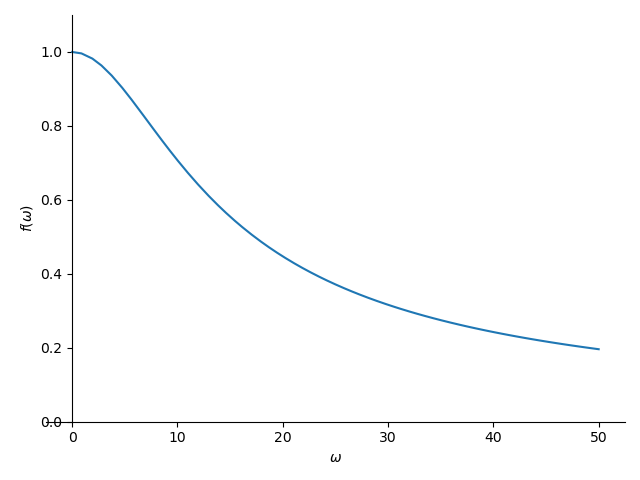

In [89]:
omega = sym.symbols('\omega')
wc = 10
p1=sym.plot(10/sym.sqrt(omega**2+wc**2), (omega, 0, 50), ylim=[0,1.1], axis_center=None)
fig = p1._backend.fig
ax = p1._backend.ax[0]
ax.set_xticks([wc])
ax.set_xticklabels([r'$\omega_c$'])
ax.set_yticks([1, 1/np.sqrt(2)])
ax.set_yticklabels([r'$M_0$', r'$\frac{M_0}{\sqrt{2}}$'])
ax.plot([wc, wc, 0], [0, 1/np.sqrt(2), 1/np.sqrt(2)], color='dodgerblue', ls='-.')
ax.plot([wc, wc, 0], [0, 1, 1], color='red', ls='--')
ax.arrow(19,0.18,-7,-0.14, width=0.01, head_width = 0.05, head_length=2)
ax.arrow(0.2,0.3,9.8,0, width=0.01, head_width = 0.05, head_length=2, length_includes_head=True)
ax.arrow(8,0.3,-8,0, width=0.01, head_width = 0.05, head_length=2, length_includes_head=True)
ax.arrow(14.95,0.81,-4.9, 0, width=0.01, head_width = 0.05, head_length=2, length_includes_head=True)
ax.arrow(40,0.4,-5, -0.1, width=0.01, head_width = 0.05, head_length=2, length_includes_head=True)
# ax.plot([3*tau, 3*tau, 0], [0, 1/2.71**3, 1/2.71**3], color='dodgerblue', ls='--')
plt.text(12, 0.2, 'frequência de corte')
plt.text(1, 0.35, '  banda \n passante')
plt.text(15, 0.8, '  filtro ideal')
plt.text(40, 0.4, '  filtro real')
fig.canvas.draw_idle()

### Exemplo 1

Considere o filtro passa-baixas ideal com a seguinte resposta em frequência.

$H(j\omega) = \left\{\begin{array}{cc}1& |\omega|<10\pi \text{ rad/s} \\ 0 &, |\omega|>10\pi \text{ rad/s} \end{array}\right.$

Vamos encontrar a saída desse sistema para a seguinte entrada:

$x(t) = 2+\mathrm{sen}(3\pi t) + \cos\left(13\pi t+\frac{\pi}{2}\right)$

A saída de um sistema linear e invariante no tempo para uma entrada senoidal de frequência $\omega_0$  é:

$H(j\omega_0)\mathrm{sen}(\omega_0t)$

Como a frequência de corte desse sistema é $\omega_c=10\pi$ rad/s, qualquer termo com frequência maior que essa frequência é eliminada da saída. Então:

$$



### Filtro passa-faixas

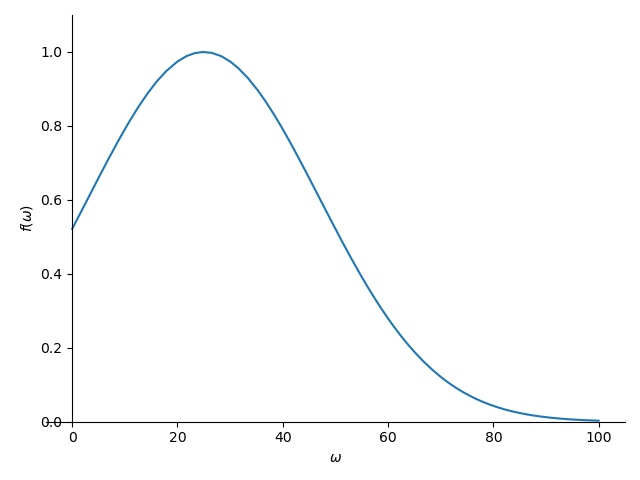

In [196]:
omega = sym.symbols('\omega')
wc1 = 10
wc2 = 40
p1=sym.plot(sym.exp(-(omega-25)**2/(2*480)), (omega, 0, 100), ylim=[0,1.1], axis_center=None)
fig = p1._backend.fig
ax = p1._backend.ax[0]
ax.set_xticks([0.72*wc1, 1.08*wc2])
ax.set_xticklabels([r'$\omega_{c_1}$', r'$\omega_{c_2}$'])
ax.set_yticks([1, 1/np.sqrt(2)])
ax.set_yticklabels([r'$M_0$', r'$\frac{M_0}{\sqrt{2}}$'])
ax.plot([0.72*wc1, 0.72*wc1, 0], [0, 1/np.sqrt(2), 1/np.sqrt(2)], color='dodgerblue', ls='-.')
ax.plot([0.72*wc1, 0.72*wc1,1.08*wc2], [0, 1, 1], color='red', ls='--')
ax.plot([1.08*wc2, 1.08*wc2, 0], [0, 1/np.sqrt(2), 1/np.sqrt(2)], color='dodgerblue', ls='-.')
ax.plot([1.08*wc2, 1.08*wc2], [0, 1], color='red', ls='--')
ax.arrow(19, 0.18, -9, -0.14, width=0.01, head_width = 0.05, head_length=2)
ax.arrow(30, 0.18, 11, -0.14, width=0.01, head_width = 0.05, head_length=2)
ax.arrow(8, 0.3, 35, 0, width=0.01, head_width = 0.05, head_length=2, length_includes_head=True)
ax.arrow(42, 0.3, -35, 0, width=0.01, head_width = 0.05, head_length=2, length_includes_head=True)
ax.arrow(12, 0.51, -4.9, 0, width=0.01, head_width = 0.05, head_length=2, length_includes_head=True)
ax.arrow(25, 0.8, 10, 0.1, width=0.01, head_width = 0.05, head_length=2, length_includes_head=True)
# ax.plot([3*tau, 3*tau, 0], [0, 1/2.71**3, 1/2.71**3], color='dodgerblue', ls='--')
plt.text(12, 0.2, 'frequências de corte')
plt.text(20, 0.32, '  banda \n passante')
plt.text(12.1, 0.5, '  filtro ideal')
plt.text(20, 0.75, '  filtro real')
fig.canvas.draw_idle()

### Filtro passa-altas

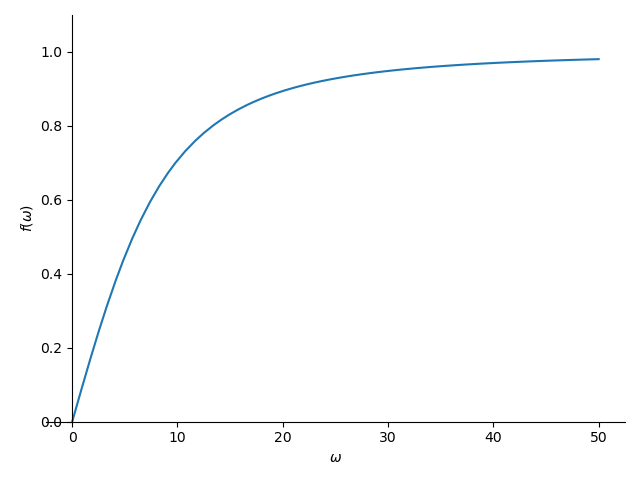

In [111]:
omega = sym.symbols('\omega')
wc = 10
p1=sym.plot(omega/sym.sqrt(omega**2+wc**2), (omega, 0, 50), ylim=[0,1.1], axis_center=None)
fig = p1._backend.fig
ax = p1._backend.ax[0]
ax.set_xticks([wc])
ax.set_xticklabels([r'$\omega_c$'])
ax.set_yticks([1, 1/np.sqrt(2)])
ax.set_yticklabels([r'$M_0$', r'$\frac{M_0}{\sqrt{2}}$'])
ax.plot([wc, wc, 0], [0, 1/np.sqrt(2), 1/np.sqrt(2)], color='dodgerblue', ls='-.')
ax.plot([wc, wc, 50], [0, 1, 1], color='red', ls='--')
ax.arrow(19, 0.18, -7, -0.14, width=0.01, head_width = 0.05, head_length=2)
ax.arrow(10.2, 0.3, 38, 0, width=0.01, head_width = 0.05, head_length=2, length_includes_head=True)
ax.arrow(48, 0.3, -38, 0, width=0.01, head_width = 0.05, head_length=2, length_includes_head=True)
ax.arrow(14.95, 0.51, -4.9, 0, width=0.01, head_width = 0.05, head_length=2, length_includes_head=True)
ax.arrow(40,0.7,-6, 0.25, width=0.01, head_width = 0.05, head_length=2, length_includes_head=True)
# ax.plot([3*tau, 3*tau, 0], [0, 1/2.71**3, 1/2.71**3], color='dodgerblue', ls='--')
plt.text(12, 0.2, 'frequência de corte')
plt.text(30, 0.35, '  banda \n passante')
plt.text(15, 0.5, '  filtro ideal')
plt.text(40, 0.7, '  filtro real')
fig.canvas.draw_idle()

## Filtro rejeita-banda

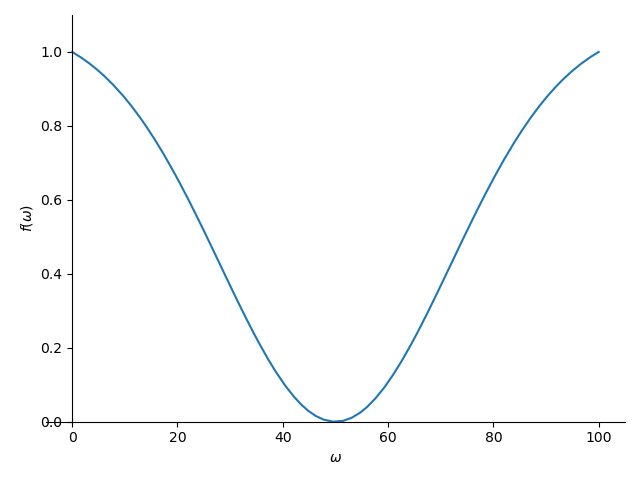

In [242]:
omega = sym.symbols('\omega')
wc1 = 10
wc2 = 40
p1=sym.plot((1-sym.exp(-(omega-50)**2/(2*480)))*1.08, (omega, 0, 100), ylim=[0,1.1], axis_center=None)
fig = p1._backend.fig
ax = p1._backend.ax[0]
ax.set_xticks([1.8*wc1, 2.05*wc2])
ax.set_xticklabels([r'$\omega_{c_1}$', r'$\omega_{c_2}$'])
ax.set_yticks([1, 1/np.sqrt(2)])
ax.set_yticklabels([r'$M_0$', r'$\frac{M_0}{\sqrt{2}}$'])
ax.plot([1.8*wc1, 1.8*wc1, 0], [0, 1/np.sqrt(2), 1/np.sqrt(2)], color='dodgerblue', ls='-.')
ax.plot([1.8*wc1, 1.8*wc1, 0], [0, 1, 1], color='red', ls='--')
ax.plot([2.05*wc2, 2.05*wc2, 0], [0, 1/np.sqrt(2), 1/np.sqrt(2)], color='dodgerblue', ls='-.')
ax.plot([2.05*wc2, 2.05*wc2,100], [0, 1,1], color='red', ls='--')
ax.arrow(30, 0.18, -9, -0.14, width=0.01, head_width = 0.05, head_length=2)
ax.arrow(50, 0.18, 30, -0.15, width=0.01, head_width = 0.05, head_length=2)
ax.arrow(1.8*wc1+5, 0.85, 58, 0, width=0.01, head_width = 0.05, head_length=2, length_includes_head=True)
ax.arrow(2.05*wc2-5, 0.85, -58, 0, width=0.01, head_width = 0.05, head_length=2, length_includes_head=True)
ax.arrow(12, 0.51, -4.9, 0, width=0.01, head_width = 0.05, head_length=2, length_includes_head=True)
ax.arrow(56, 0.48, 13, -0.12, width=0.01, head_width = 0.05, head_length=2, length_includes_head=True)
# ax.plot([3*tau, 3*tau, 0], [0, 1/2.71**3, 1/2.71**3], color='dodgerblue', ls='--')
plt.text(30, 0.2, 'frequências de corte')
plt.text(40, 0.9, 'banda de\n rejeição')
plt.text(12.1, 0.5, '  filtro ideal')
plt.text(50, 0.5, '  filtro real')
fig.canvas.draw_idle()

$H_1(s) = \frac{(s+1)(s+10)}{(s+2)(s+5)} = \frac{s^2+11s+10}{s^2+7s+10}$

$H_2(s) = \frac{(s-1)(s+10)}{(s+2)(s+5)} = \frac{s^2+9s-10}{s^2+7s+10}$

In [21]:
import sympy as sym

omega = sym.symbols('\omega', real=True)
s = sym.symbols('s')

H1 = (s**2+11*s+10)/(s**2+7*s+10)
H2 = (s**2+9*s-10)/(s**2+7*s+10)
H

(s**2 + 11*s + 10)/(s**2 + 7*s + 10)

In [22]:
H1w = H1.subs(s, sym.I*omega)
H2w = H2.subs(s, sym.I*omega)

In [23]:
H1wabs = sym.simplify(sym.Abs(H1w))
H1wfase = sym.simplify(sym.arg(H1w))
H2wabs = sym.simplify(sym.Abs(H2w))
H2wfase = sym.simplify(sym.arg(H2w))

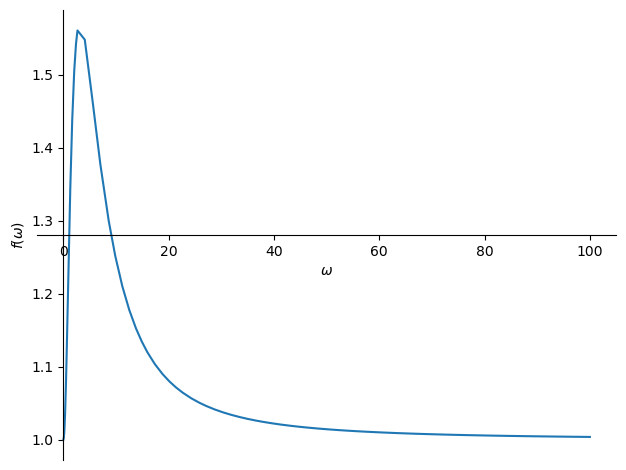

In [24]:
sym.plot(H1wabs, (omega, 0, 100))

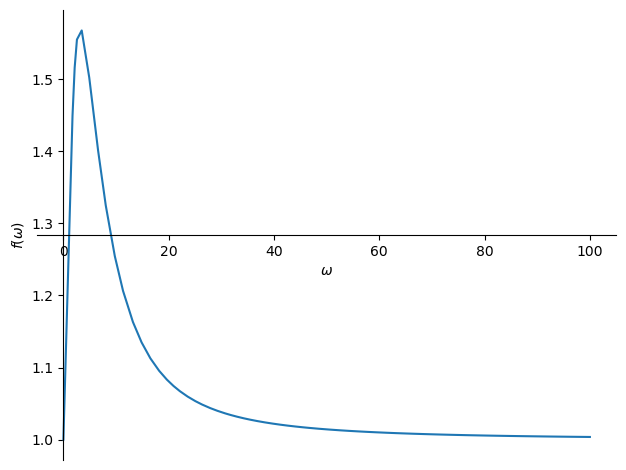

In [27]:
sym.plot(H2wabs, (omega, 0, 100))

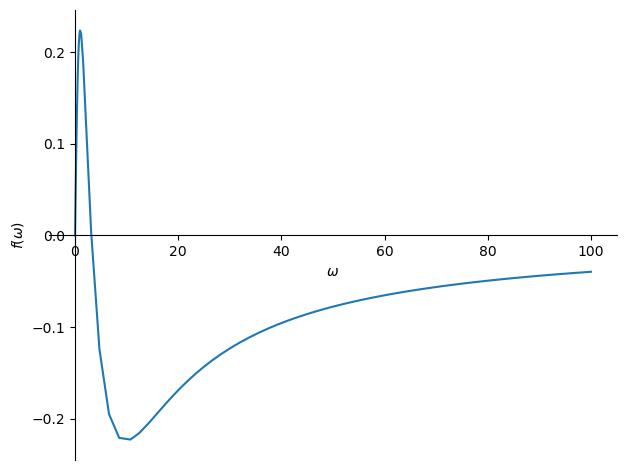

In [25]:
sym.plot(H1wfase, (omega, 0, 100))

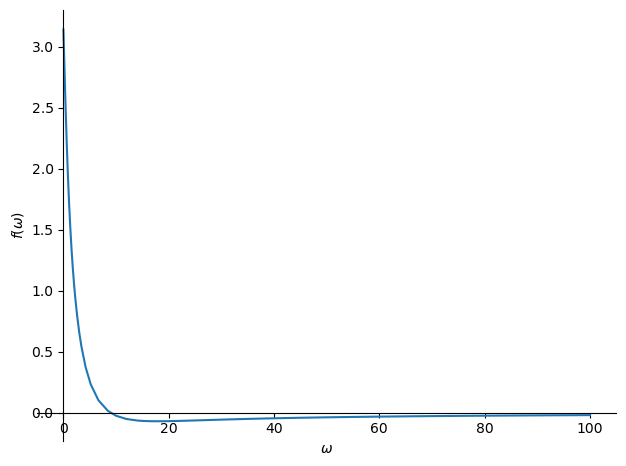

In [26]:
sym.plot(H2wfase, (omega, 0, 100))